In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import kagglehub
path = kagglehub.dataset_download("quora/question-pairs-dataset")

100%|██████████| 20.8M/20.8M [00:00<00:00, 113MB/s] 

Extracting files...


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(f"{path}/questions.csv")

In [5]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
new_df = df.sample(30000, random_state=1)

In [7]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
236588,236588,466074,466075,What are good gifts for a foreign visitor to b...,What are good gifts for a foreign visitor to b...,0
284623,284623,413904,559402,What's a good alternative cut to brisket if I ...,What is the best wood to smoke brisket?,0
37445,37445,74608,74609,Which horror movie has the most jump scares?,Is it possible to create a good horror film wi...,0
299330,299330,587921,587922,What's your ethical take on the vegetarian vs ...,Can a non vegetarian date a vegetarian?,0
204421,204421,403323,403324,What are some good tips for young biotech ente...,What must young entrepreneurs know before they...,0


In [8]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


<Axes: xlabel='is_duplicate'>

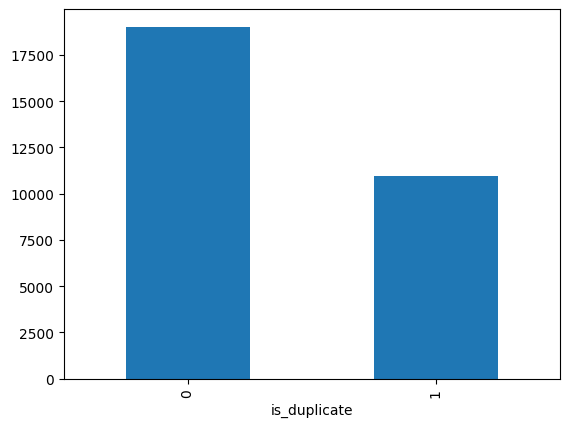

In [9]:
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [10]:
qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts() > 1
print('Number of questions getting repeated', x[x].shape[0])

Number of unique questions 59841
Number of questions getting repeated 141


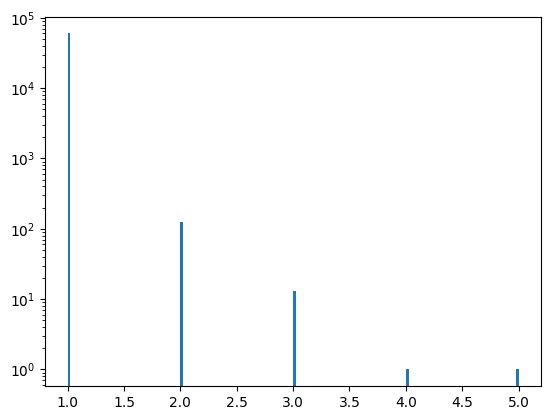

In [11]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

# Feature Engineering

In [12]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [13]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
236588,236588,466074,466075,What are good gifts for a foreign visitor to b...,What are good gifts for a foreign visitor to b...,0,120,119
284623,284623,413904,559402,What's a good alternative cut to brisket if I ...,What is the best wood to smoke brisket?,0,61,39
37445,37445,74608,74609,Which horror movie has the most jump scares?,Is it possible to create a good horror film wi...,0,44,64
299330,299330,587921,587922,What's your ethical take on the vegetarian vs ...,Can a non vegetarian date a vegetarian?,0,76,39
204421,204421,403323,403324,What are some good tips for young biotech ente...,What must young entrepreneurs know before they...,0,56,63


In [14]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))

In [15]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
236588,236588,466074,466075,What are good gifts for a foreign visitor to b...,What are good gifts for a foreign visitor to b...,0,120,119,22,22
284623,284623,413904,559402,What's a good alternative cut to brisket if I ...,What is the best wood to smoke brisket?,0,61,39,12,8
37445,37445,74608,74609,Which horror movie has the most jump scares?,Is it possible to create a good horror film wi...,0,44,64,8,12
299330,299330,587921,587922,What's your ethical take on the vegetarian vs ...,Can a non vegetarian date a vegetarian?,0,76,39,12,7
204421,204421,403323,403324,What are some good tips for young biotech ente...,What must young entrepreneurs know before they...,0,56,63,9,10


In [16]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [17]:
new_df['word_common'] = new_df.apply(common_words, axis=1)

In [18]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
236588,236588,466074,466075,What are good gifts for a foreign visitor to b...,What are good gifts for a foreign visitor to b...,0,120,119,22,22,19
284623,284623,413904,559402,What's a good alternative cut to brisket if I ...,What is the best wood to smoke brisket?,0,61,39,12,8,1
37445,37445,74608,74609,Which horror movie has the most jump scares?,Is it possible to create a good horror film wi...,0,44,64,8,12,3
299330,299330,587921,587922,What's your ethical take on the vegetarian vs ...,Can a non vegetarian date a vegetarian?,0,76,39,12,7,1
204421,204421,403323,403324,What are some good tips for young biotech ente...,What must young entrepreneurs know before they...,0,56,63,9,10,2


In [19]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [20]:
new_df['word_total'] = new_df.apply(total_words, axis=1)

In [21]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
236588,236588,466074,466075,What are good gifts for a foreign visitor to b...,What are good gifts for a foreign visitor to b...,0,120,119,22,22,19,40
284623,284623,413904,559402,What's a good alternative cut to brisket if I ...,What is the best wood to smoke brisket?,0,61,39,12,8,1,20
37445,37445,74608,74609,Which horror movie has the most jump scares?,Is it possible to create a good horror film wi...,0,44,64,8,12,3,20
299330,299330,587921,587922,What's your ethical take on the vegetarian vs ...,Can a non vegetarian date a vegetarian?,0,76,39,12,7,1,17
204421,204421,403323,403324,What are some good tips for young biotech ente...,What must young entrepreneurs know before they...,0,56,63,9,10,2,19


In [22]:
new_df['word_share'] = round(new_df['word_common'] / new_df['word_total'], 2)

In [23]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
236588,236588,466074,466075,What are good gifts for a foreign visitor to b...,What are good gifts for a foreign visitor to b...,0,120,119,22,22,19,40,0.48
284623,284623,413904,559402,What's a good alternative cut to brisket if I ...,What is the best wood to smoke brisket?,0,61,39,12,8,1,20,0.05
37445,37445,74608,74609,Which horror movie has the most jump scares?,Is it possible to create a good horror film wi...,0,44,64,8,12,3,20,0.15
299330,299330,587921,587922,What's your ethical take on the vegetarian vs ...,Can a non vegetarian date a vegetarian?,0,76,39,12,7,1,17,0.06
204421,204421,403323,403324,What are some good tips for young biotech ente...,What must young entrepreneurs know before they...,0,56,63,9,10,2,19,0.11


# Analysis of Features

minimum characters 1
maximum characters 345
average num of characters 59


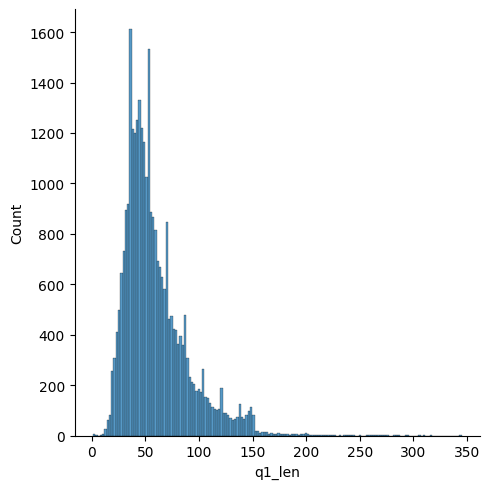

In [24]:
sns.displot(new_df['q1_len'])
print('minimum characters', new_df['q1_len'].min())
print('maximum characters', new_df['q1_len'].max())
print('average num of characters', int(new_df['q1_len'].mean()))

minimum characters 2
maximum characters 1151
average num of characters 60


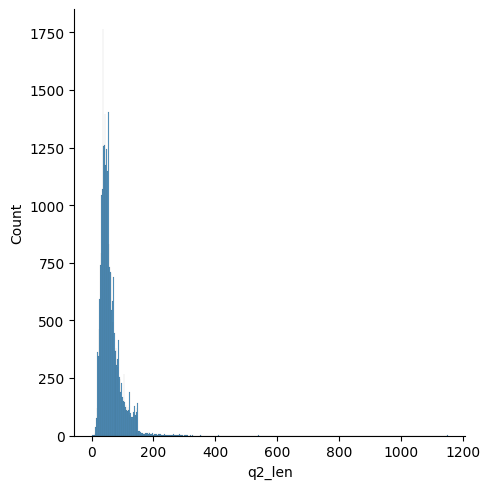

In [25]:
sns.displot(new_df['q2_len'])
print('minimum characters', new_df['q2_len'].min())
print('maximum characters', new_df['q2_len'].max())
print('average num of characters', int(new_df['q2_len'].mean()))

minimum words 1
maximum words 68
average num of words 10


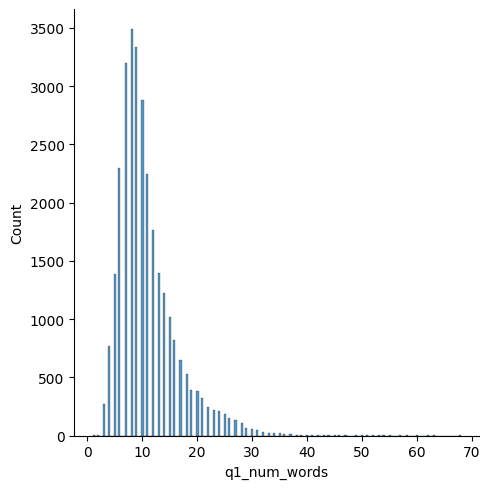

In [26]:
sns.displot(new_df['q1_num_words'])
print('minimum words', new_df['q1_num_words'].min())
print('maximum words', new_df['q1_num_words'].max())
print('average num of words', int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


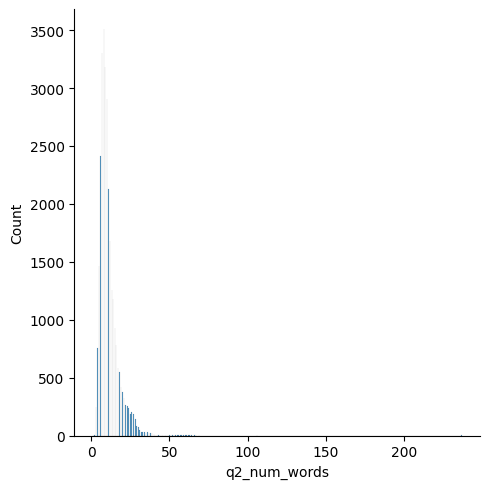

In [27]:
sns.displot(new_df['q2_num_words'])
print('minimum words', new_df['q2_num_words'].min())
print('maximum words', new_df['q2_num_words'].max())
print('average num of words', int(new_df['q2_num_words'].mean()))

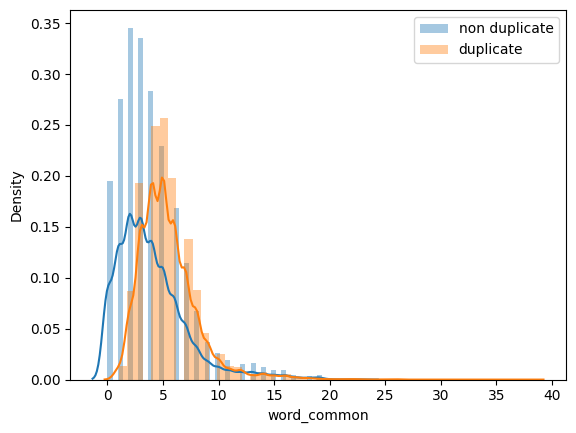

In [28]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'], label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'], label='duplicate')
plt.legend()
plt.show()

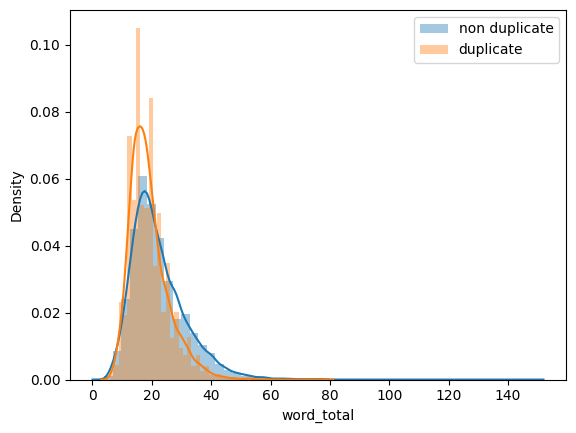

In [29]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

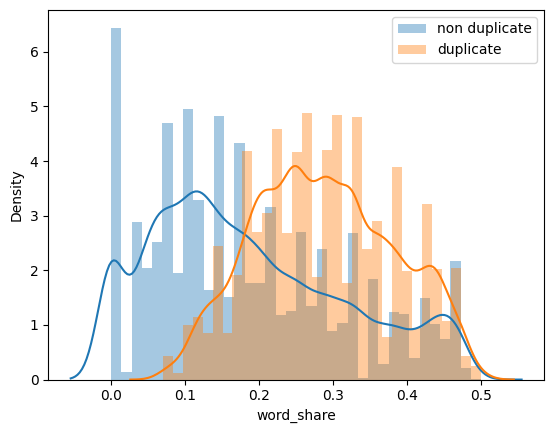

In [30]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [31]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
236588,What are good gifts for a foreign visitor to b...,What are good gifts for a foreign visitor to b...
284623,What's a good alternative cut to brisket if I ...,What is the best wood to smoke brisket?
37445,Which horror movie has the most jump scares?,Is it possible to create a good horror film wi...
299330,What's your ethical take on the vegetarian vs ...,Can a non vegetarian date a vegetarian?
204421,What are some good tips for young biotech ente...,What must young entrepreneurs know before they...


In [32]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])

In [33]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
236588,0,120,119,22,22,19,40,0.48
284623,0,61,39,12,8,1,20,0.05
37445,0,44,64,8,12,3,20,0.15
299330,0,76,39,12,7,1,17,0.06
204421,0,56,63,9,10,2,19,0.11


# Vectorization and Training

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=3000)
questions = list(ques_df['question1']) + list(ques_df['question2'])
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(), 2)

In [35]:
temp_df1 = pd.DataFrame(q1_arr, index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)

In [36]:
temp_df.shape

(30000, 6000)

In [37]:
final_df = pd.concat([final_df, temp_df], axis=1)

In [38]:
final_df.shape

(30000, 6008)

In [39]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
236588,0,120,119,22,22,19,40,0.48,0,0,...,0,0,0,0,0,0,0,0,0,0
284623,0,61,39,12,8,1,20,0.05,0,0,...,0,0,0,0,0,0,0,0,0,0
37445,0,44,64,8,12,3,20,0.15,0,0,...,0,0,0,0,0,0,0,0,0,0
299330,0,76,39,12,7,1,17,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
204421,0,56,63,9,10,2,19,0.11,0,0,...,0,0,0,0,1,0,0,0,0,0


In [41]:
x = final_df.iloc[:,1:].values
y = final_df.iloc[:,0].values

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)

0.7605

In [44]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier()
xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)
accuracy_score(y_test, y_pred)

0.7673333333333333